# **Analysing Schizophrenia: Insights from Patient Data**

In [ ]:
# Load data set from Kaggle
!pip install kaggle

from google.colab import drive
drive.mount('/content/drive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

!kaggle datasets download -d asinow/schizohealth-dataset

Mounted at /content/drive
403 - Forbidden - Permission 'datasets.get' was denied


*While this project was ongoing, the creator of the data set deleted their kaggle account/their data set. I did not download the data set locally, which is a mistake on my part. Any missing code will be indicated.*

*Running the code cells would not be possible as the data set is no longer available and would result in errors as I initially loaded the data set online directly to Colab. Something for me to think about when using Kaggle data sets... Lesson learned :-).*

## **Data Preprocessing**

In this section, we will import all our necessary libraries. Then, preprocess the data frame as needed. The columns are in a foreign language, but luckily the creator provided the English translations on their Kaggle site. We will first change all the column names to English.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
data_tk = pd.read_csv('/content/schizohealth-dataset.zip')

# The data set is in a foreign language so we need to rename the columns in English.
data = data_tk.rename(columns={'Hasta_ID': 'patient_ID',
                               'Yaş': 'age',
                               'Cinsiyet': 'gender',
                               'Eğitim_Seviyesi': 'education_level',
                               'Medeni_Durum':'marital_status',
                               'Meslek': 'occupation',
                               'Gelir_Düzeyi': 'income_level',
                               'Yaşadığı_Yer': 'living_area',
                               'Tanı': 'diagnosis',
                               'Hastalık_Süresi': 'disease_duration',
                               'Hastaneye_Yatış_Sayısı': 'hospitalisation',
                               'Ailede_Şizofreni_Öyküsü': 'family_history',
                               'Madde_Kullanımı': 'substance_use',
                               'İntihar_Girişimi': 'suicide_attempt',
                               'Pozitif_Semptom_Skoru': 'positive_symptoms_score',
                               'Negatif_Semptom_Skoru': 'negative_symptoms_score',
                               'GAF_Skoru': 'GAF',
                               'Sosyal_Destek': 'social_support',
                               'Stres_Faktörleri': 'stress_factors',
                               'İlaç_Uyumu': 'medication_adherence'})

data.columns
data.head()

,patient_ID,age,gender,education_level,marital_status,occupation,income_level,living_area,diagnosis,disease_duration,hospitalisation,family_history,substance_use,suicide_attempt,positive_symptoms_score,negative_symptoms_score,GAF,social_support,stress_factors,medication_adherence
0,1,72,1,4,2,0,2,1,0,0,0,0,0,0,32,48,72,0,2,2
1,2,49,1,5,2,2,1,0,1,35,1,1,1,1,51,63,40,2,2,0
2,3,53,1,5,3,2,1,0,1,32,0,1,0,0,72,85,51,0,1,1
3,4,67,1,3,2,0,2,0,0,0,0,0,1,0,10,21,74,1,1,2
4,5,54,0,1,2,0,2,1,0,0,0,0,0,0,4,27,98,0,1,0


Since the data set is artificial and used for the purpose of data analysis, there were no NA variables found. We can now move on to the next section.

## **Summary Statistics**
Let's begin with summarising our data frame. We will look into age groups and perform a Pearson Correlation Matrix.

The data set is all numerical. For documentation purposes, here is a list of some columns that require a bit more information than just numbers:
* Gender – 0: Female, 1: Male
* Education_Level – 1: Primary, 2: Middle School, 3: High School, 4: University, 5: Postgraduate
* Marital_Status – 0: Single, 1: Married, 2: Divorced, 3: Widowed
* Occupation – 0: Unemployed, 1: Employed, 2: Retired, 3: Student
* Income_Level – 0: Low, 1: Medium, 2: High
* Living_Area – 0: Rural, 1: Urban
* Social_Support – 0: Low, 1: Medium, 2: High
* Stress_Factors – 0: Low, 1: Medium, 2: High
* Medication_Adherence – 0: Poor, 1: Moderate, 2: Good

In [ ]:
# Summary statistics - summarise data for each age group
data_young = data[data['age'] <18]
print('Summary of data of minors:')
print(data_young)

data_yadult = data[(data['age'] >= 18) & (data['age'] <= 35)]
print('\n Summary of data of young adults:')
print(data_yadult.describe())

data_adult = data[(data['age'] > 35) & (data['age'] <= 55)]
print('\n Summary of data of adults:')
print(data_adult.describe())

data_senior = data[data['age'] > 55]
print('\n Summary of data of seniors:')
print(data_senior.describe())

Summary of data of minors:
Empty DataFrame
Columns: [patient_ID, age, gender, education_level, marital_status, occupation, income_level, living_area, diagnosis, disease_duration, hospitalisation, family_history, substance_use, suicide_attempt, positive_symptoms_score, negative_symptoms_score, GAF, social_support, stress_factors, medication_adherence, age_group]
Index: []

[0 rows x 21 columns]

 Summary of data of young adults:
        patient_ID          age       gender  education_level  marital_status  \
count  2905.000000  2905.000000  2905.000000      2905.000000     2905.000000   
mean   5045.044062    26.573150     0.503614         3.051291        1.499828   
std    2888.425194     5.234208     0.500073         1.411698        1.109105   
min       7.000000    18.000000     0.000000         1.000000        0.000000   
25%    2549.000000    22.000000     0.000000         2.000000        1.000000   
50%    5054.000000    27.000000     1.000000         3.000000        1.000000   
7

We can then move on to grouping their age groups. Because the data set does not have data for people under 18, I divided the adult group into two: Young adults (18-30) and adults (31-50). Individuals over 50 years of age are categorised as seniors.

0             Senior
1              Adult
2              Adult
3             Senior
4              Adult
            ...     
9995          Senior
9996    Young Adults
9997           Adult
9998          Senior
9999           Adult
Name: age_group, Length: 10000, dtype: object

Number of diagnoses per age group: 
 age_group
Adult           1133
Senior          1185
Young Adults     569
Name: age_group, dtype: int64


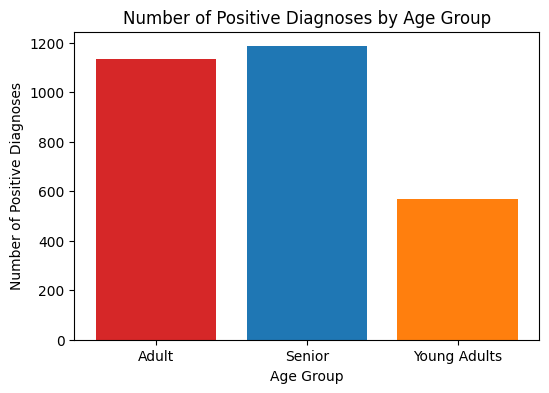

In [ ]:
# Grouping and Aggregation
# Let's see how many positive diagnoses per age group there are.
# Grouping ages
data['age_group'] = '' # Creating an empty column

def categorise_age(ages): # Create a function to categorise age groups
    if ages <= 30:
      return 'Young Adults'
    elif ages <= 55:
      return 'Adult'
    else:
      return 'Senior'

data['age_group'] = data['age'].apply(categorise_age) # Apply the function to store age groups in the empty column
print(data['age_group'])

# Group positive diagnoses by ages
pos_age_group = data[data['diagnosis'] == 1].groupby('age_group')['age_group'].count()
print('\nNumber of diagnoses per age group: \n', pos_age_group)

# Barplot
plt.figure(figsize=(6, 4))
bar_colors = ['tab:red', 'tab:blue', 'tab:orange'] # Set bar colours
plt.bar(pos_age_group.index, pos_age_group.values, label= pos_age_group.index, color= bar_colors )
plt.xlabel('Age Group')
plt.ylabel('Number of Positive Diagnoses')
plt.title('Number of Positive Diagnoses by Age Group')
plt.show()

We can see from the graph that seniors are mostly affected from schizophrenia and has the highest number of diagnosis. Adults follow closely and young adults are just below the 600 line.

Next, we will perform a Pearson Correlation Matrix. This makes it easier to see which variable correlate with which positively and negatively.

Columns have been chosen in a way where correlation scores are larger than 0.09 or -0.09.

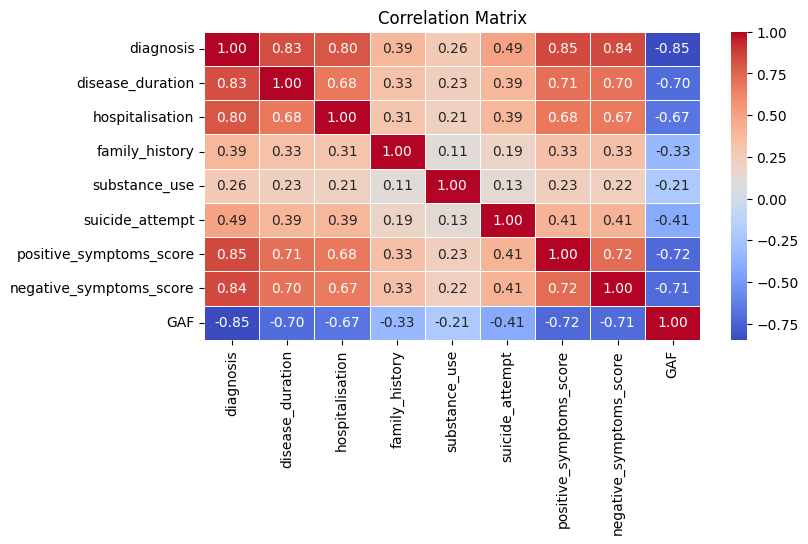

In [ ]:
# Correlation Matrix
predictor_columns = ['diagnosis', 'disease_duration', 'hospitalisation', 'family_history',
                     'substance_use', 'suicide_attempt', 'positive_symptoms_score',
                     'negative_symptoms_score', 'GAF'] # Use columns that have an extreme correlation score with eachother

corr_matrix = data[predictor_columns].corr()

plt.figure(figsize = (8, 4))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

## **Data Analysis**
Taken from the correlation matrix, we see that positive and negative symptom scores correlate positively with diagnosis duration. This can be interesting to dive into.

We will first check the distributions of each symptom score.

*At the time of continuing this project, I found out that the creator of the data set has deleted their kaggle account/data set. Unfortunately, I did not save the data set locally and cannot upload the data set to this notebook which was a mistake on my part. I have yet to check the distribution of the negative symptom score so we will skip the part as rerunning all the code will result in errors*

### Symptom scores vs. Disease Duration

Text(0, 0.5, 'Frequency')

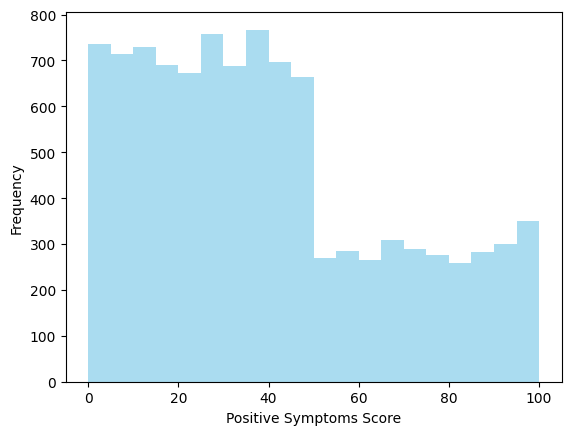

In [ ]:
# Check distribution of each symptom score
plt.hist(data['positive_symptoms_score'], bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Positive Symptoms Score')
plt.ylabel('Frequency')

In this part, we will perform linear regression. We would like to see if the relationship between the symptoms scores and the disease duration is linear and whether the length of diagnosis could predict each symptom score.

Patients with 0 disease duration is also included as we will consider the possibility that the patient is undiagnosed or that non-schizophrenics also have symptoms.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Perform regression for positive symptoms

X = data[['disease_duration']]
y = data['positive_symptoms_score']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Regression Equation: positive symptoms = {:.10f} * age + {:.2f}".format(slope, intercept))
print("Slope (coefficient for disease duration): {:.10f}".format(slope))
print("Intercept: {:.2f}".format(intercept))
print("R^2 (goodness of fit): {:.8f}".format(r2))

Regression Equation: positive symptoms = 1.7451011035 * age + 28.79
Slope (coefficient for disease duration): 1.7451011035
Intercept: 28.79
R^2 (goodness of fit): 0.50129618


In [ ]:
# Perform regression for negative symptoms

X = data[['disease_duration']]
y = data['negative_symptoms_score']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Regression Equation: negative symptoms = {:.10f} * age + {:.2f}".format(slope, intercept))
print("Slope (coefficient for disease duration): {:.10f}".format(slope))
print("Intercept: {:.2f}".format(intercept))
print("R^2 (goodness of fit): {:.8f}".format(r2))

Regression Equation: negative symptoms = 1.7148997512 * age + 29.41
Slope (coefficient for disease duration): 1.7148997512
Intercept: 29.41
R^2 (goodness of fit): 0.49343773


Next, we will plot the scatter plots of the positive and negative symptom scores.

Text(0, 0.5, 'Negative Symptoms')

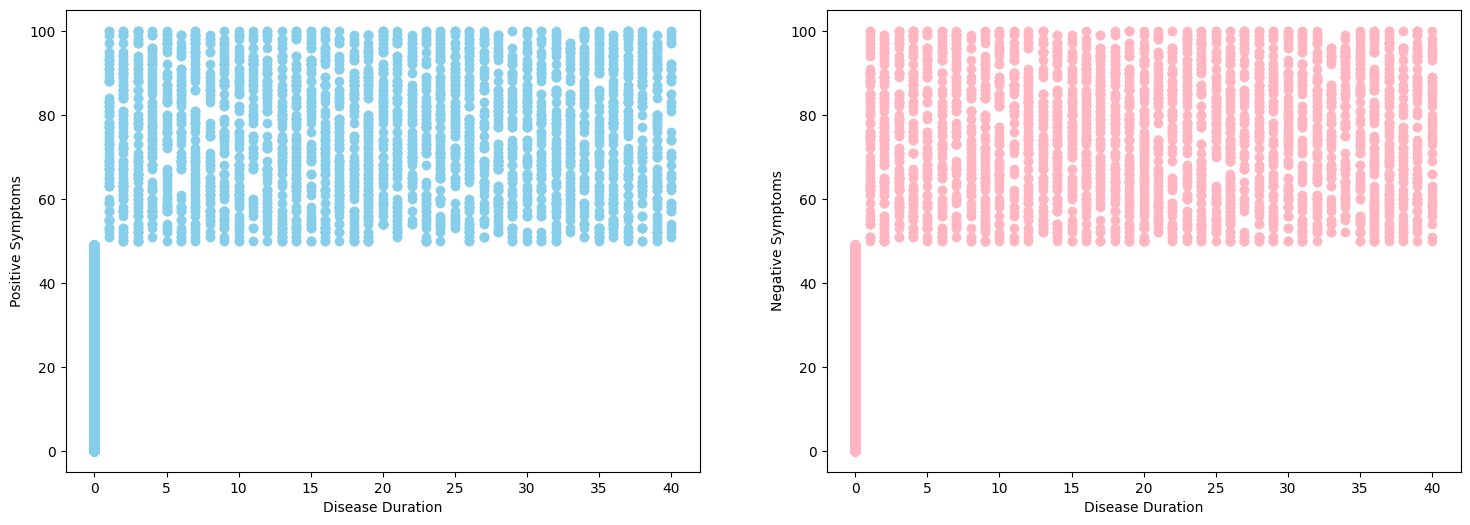

In [ ]:
import matplotlib.pyplot as plt
# Visualise
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.scatter(x= data['disease_duration'], y= data['positive_symptoms_score'], color = 'skyblue', label= 'Positive Symptoms')
plt.xlabel('Disease Duration')
plt.ylabel('Positive Symptoms')

plt.subplot(1, 2, 2)
plt.scatter(x= data['disease_duration'], y= data['negative_symptoms_score'], color = 'lightpink', label= 'Negative Symptoms')
plt.xlabel('Disease Duration')
plt.ylabel('Negative Symptoms')

The relationship between disease duration and each symptom score is not linear. However we can see that patients with disease duration of more than 0 have extreme symptoms (both positive and negative symptom scores are above 50). Meanwhile, patients with disease duration of 0 (this could mean undiagnosed or non-schizophrenics) has a milder symptom score.

Because the last analysis did not provide us with a clear relationship between disease duration and each symptom score, we would like to then plot the positive vs. negative symptom score to see whether we could see a trend between diagnosed and undiagnosed patients.

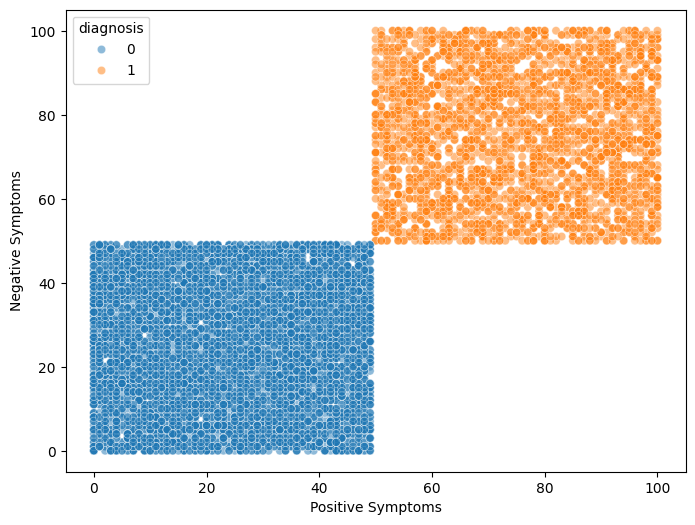

In [ ]:
# Plot positive vs. negative symptoms, set hue to differentiate diagnoses.
plt.figure(figsize=(8, 6))
sns.scatterplot(x= data['positive_symptoms_score'], y= data['negative_symptoms_score'], hue= data['diagnosis'], alpha= 0.5)
plt.xlabel('Positive Symptoms')
plt.ylabel('Negative Symptoms')
plt.show()

As seen from the graph, the diagnosed and undiagnosed/non-schizophrenics are very separated. Those diagnosed with schizophrenia have both high positive and negative symptom score. Meanwhile undiagnosed/non-schizophrenics have both a low positive and negative symptom score.

### GAF Score vs. Diagnosis
To continue, we will see the differences of diagnosed and undiagnosed/non-schizophrenic patients GAF scores.

We will first inspect the GAF range, the minimum and maximum value of GAF score of patients from the data set.

In [ ]:
# Inspect GAF range
print(data['GAF'].unique())
print('Lowest GAF score:', {data['GAF'].min()})
print('Highest GAF score:', {data['GAF'].max()})

[ 72  40  51  74  98  89  85  20  93  46  66  57  44  96  75  67  69  71
  63  86  94  62  84  64  65  41  50  99  82  91  90  13  68  73  83  29
  58  17  87  56  95  60  92  16  10  53  47  15  38 100  30  61  23  25
  81  70  55  52  42  24  97  78  28  32  39  80  22  35  77  26  76  54
  31  59  79  18  19  43  33  49  45  14  48  88  11  21  37  12  27  36
  34]
Lowest GAF score: {10}
Highest GAF score: {100}


Next we will do a box plot of GAF score vs diagnosis.

<ipython-input-15-7125388c8e78>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='GAF', data=data, palette={'0': 'mediumseagreen', '1': 'coral'})


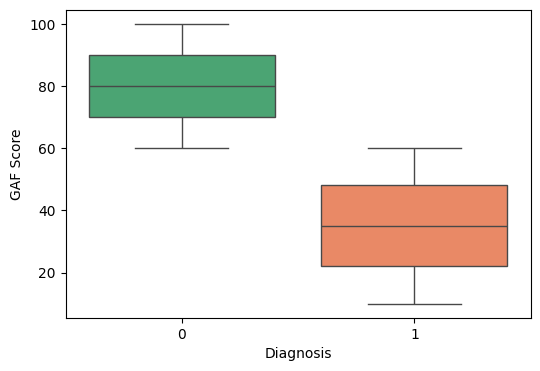

In [ ]:
# Plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='diagnosis', y='GAF', data=data, palette={'0': 'mediumseagreen', '1': 'coral'})
plt.xlabel('Diagnosis')
plt.ylabel('GAF Score')
plt.show()

We can see that undiagnosed/non-schizophrenic patients have a relatively higher GAF score with a median of 80. On the other hand, diagnosed patients have an median GAF score of 40, half the score of undiagnosed/non-schizophrenics.

We will also perform a GLM on the data. To check if we can perform linear regression on the GAF score, let's check whether it is normally distributed.

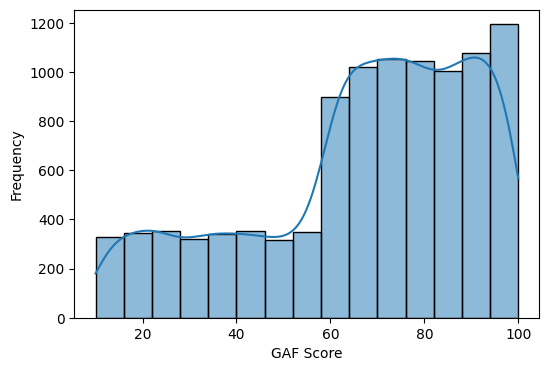

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data['GAF'], bins=15, kde=True)
plt.xlabel('GAF Score')
plt.ylabel('Frequency')
plt.show()


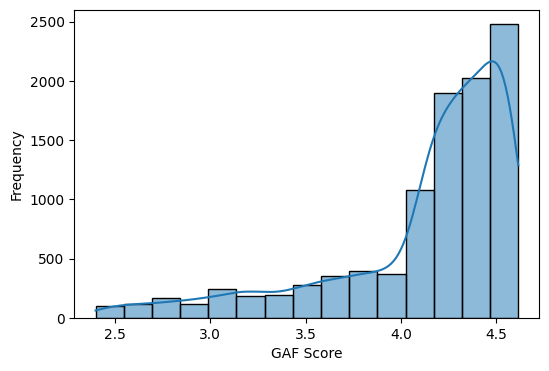

In [ ]:
import numpy as np

# Implement log transformation
data['GAF_log'] = np.log(data['GAF'] + 1)

plt.figure(figsize=(6, 4))
sns.histplot(data['GAF_log'], bins=15, kde=True)
plt.xlabel('GAF Score')
plt.ylabel('Frequency')
plt.show()

After regularisation with log transformation, we can see that the distribution is still left-skewed. That means we can perform gamma regression on the data.

*As you can see, I used a lot of variables for the X data. I was experimenting with the amount of predictor variables and how that would affect the R^2 score. Continuing the project, I wasn't able to change it back as rerunning the code would result in an error as the data set is no longer available online.*

In [ ]:
from sklearn.linear_model import GammaRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

gr = GammaRegressor()
scaler = StandardScaler()

X = data[['diagnosis', 'disease_duration', 'hospitalisation', 'family_history',
          'substance_use', 'suicide_attempt', 'positive_symptoms_score',
          'negative_symptoms_score']]
y = data['GAF']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gr.fit(X_train_scaled, y_train)

y_pred = gr.predict(X_test_scaled)

slope = gr.coef_[0]
intercept = gr.intercept_

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Regression Equation: GAF = {:.10f} * predictors + {:.2f}".format(slope, intercept))
print("Slope (coefficient for predictors): {:.10f}".format(slope))
print("Intercept: {:.2f}".format(intercept))
print("R^2 (goodness of fit): {:.8f}".format(r2))

Mean Absolute Error: 11.733518298846805
Regression Equation: GAF = -0.0843202470 * predictors + 4.15
Slope (coefficient for predictors): -0.0843202470
Intercept: 4.15
R^2 (goodness of fit): 0.66455161


*I also did not have time to plot the regression before the data set was removed online.*